## Webscrapping

## 1.

### I created a list of links for all the wikipedia pages for NYSE traded companies A-Z and 0-9

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import requests

In [1]:
user_agent_list = ["Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246" 
,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36 "
,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9 "
,"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1" 
,"Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"] 

In [2]:
headers = {
    'User-Agent': user_agent_list[3]}

In [5]:
def urls(letter):
    if letter == '0':
        url = "https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(0-9)"
    else:
        url = f"https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_({letter})"
    return requests.get(url).url

lst2 = []
for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ0":
    url = urls(letter)
    if url not in lst2:
        lst2.append(url)

In [ ]:
lst2

['https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(B)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(C)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(D)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(E)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(F)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(G)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(H)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(I)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(J)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(K)',
 'https://en.wikipedia.org/wiki/Companies_listed_on_th

### Crawled through all the URLs and make 1 DF with all the NYSE publically traded companies

In [ ]:
def stock_data(letter):
    url = f"https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_({letter})"
    html = requests.get(url).content
    df_list = pd.read_html(html)
    return df_list[1]

dfs = []
for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    df = stock_data(letter)
    dfs.append(df)

df1 = pd.concat(dfs)

In [ ]:
df1

,Stock name,Symbol,Country of origin
0,A. O. Smith Corporation,AOS,US
1,"A10 Networks, Inc.",ATEN,US
2,AAC Holdings Inc.,AAC,US
3,AAR Corporation,AIR,US
4,Aaron's Inc.,AAN,US
...,...,...,...
3,Zimmer Biomet,ZBH,United States
4,Zions Bancorporation,ZION,United States
5,Zuora,ZUO,United States
6,Zoetis,ZTS,United States


### Calculated the percentage of companies that contain 1 letter, 2 letters, 3 letters, 4 letters and 5 letters in the ticker

In [ ]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
for tick in df1['Symbol']:
    if len(tick) ==1:
        n1+=1
    elif len(tick) ==2:
        n2+=1
    elif len(tick) ==3:
        n3+=1
    elif len(tick) ==4:
        n4+=1
    elif len(tick) ==2:
        n5+=1
p1 = n1/(n1+n2+n3+n4+n5)
p2 = n2/(n1+n2+n3+n4+n5)
p3 = n3/(n1+n2+n3+n4+n5)
p4 = n4/(n1+n2+n3+n4+n5)
p5 = n5/(n1+n2+n3+n4+n5)


print('Percentage with 1 letter:', "{:.2%}".format(p1))
print('Percentage with 2 letters:', "{:.2%}".format(p2))
print('Percentage with 3 letters:', "{:.2%}".format(p3))
print('Percentage with 4 letters:', "{:.2%}".format(p4))
print('Percentage with 5 letters:', "{:.2%}".format(p5))

Percentage with 1 letter: 1.01%
Percentage with 2 letters: 7.96%
Percentage with 3 letters: 74.25%
Percentage with 4 letters: 16.79%
Percentage with 5 letters: 0.00%


## 2.

## Web Scraping Using Beautiful Soup

### Using Beautiful soup .findAll method I have webscraped the front page of Reddit to get a list of all of the "timestamps"

In [47]:
URL = "https://www.reddit.com"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

In [48]:
# Find all the timestamps using the "a" tag and "class" attribute
timestamps = soup.findAll(attrs={'class': '_2VF2J19pUIMSLJFky-7PEI'})

# Extract the timestamp text from each element and add it to a list
timestamp_list = []
for timestamp in timestamps:
    timestamp_list.append(timestamp.text)

# Print the list of timestamps
print(timestamp_list)

['1 hour ago', '20 hours ago', '19 hours ago', '14 hours ago', '3 hours ago', '6 hours ago', '4 hours ago', '12 hours ago']


In [49]:
timestamps

[<span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">1 hour ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">20 hours ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">19 hours ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">14 hours ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">3 hours ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">6 hours ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-click-id="timestamp" data-testid="post_timestamp" style="color:#787C7E">4 hours ago</span>,
 <span class="_2VF2J19pUIMSLJFky-7PEI" data-cl

In [50]:
tag = soup.div
tag.findChild().descendants

<generator object Tag.descendants at 0x7fc71135c190>

In [51]:
# Find all the HTML elements that contain post titles
post_title_elements = soup.find_all('h3', {'class': '_eYtD2XCVieq6emjKBH3m'})

# Extract the text content of all the child elements of each post title element and store in a list
post_titles = []
for post_title_element in post_title_elements:
    post_title = ''
    for element in post_title_element.children:
        if hasattr(element, 'text'):
            post_title += element.text
        elif isinstance(element, NavigableString):
            post_title += str(element)
    post_titles.append(post_title)

# Print the list of post titles
print(post_titles)

['[Charania] The Memphis Grizzlies have informed pending free agent Dillon Brooks that he will not be brought back under any circumstances, league sources say.', 'just wow', 'Pornhub Blocks All of Utah From Its Site', 'The Writers Guild of America is Officially On Strike', 'A Chimney in the new game Redfall.', "We are hosting a Worldwide Giveaway [Mod Approved] valued at over $300 for everything you see here. It's a way of saying thank you for supporting our 3D VTT Game Master Engine. Watch the video for details on how to enter or read the comments. Thank you! [OC]", '“When can I go back to school?”', "Woman explains how designer brands are for morons who don't know how to manage their money."]


In [52]:
# Merge lists into a dataframe
df = pd.DataFrame({'Post Title': post_titles, 'Time Stamp': timestamp_list})

# Print the dataframe
print(df)

                                          Post Title    Time Stamp
0  [Charania] The Memphis Grizzlies have informed...    1 hour ago
1                                           just wow  20 hours ago
2           Pornhub Blocks All of Utah From Its Site  19 hours ago
3  The Writers Guild of America is Officially On ...  14 hours ago
4                 A Chimney in the new game Redfall.   3 hours ago
5  We are hosting a Worldwide Giveaway [Mod Appro...   6 hours ago
6                    “When can I go back to school?”   4 hours ago
7  Woman explains how designer brands are for mor...  12 hours ago


## 3.

### I used RegEx to get all the urls of ladder faculty profiles for UCLA Economics

In [6]:
URL = 'https://economics.ucla.edu/faculty/ladder'
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
anchors = soup.find_all("a")

In [7]:
lst = []
for anchor in anchors:
    link = anchor.get("href")
    lst.append(link)

In [8]:
lst

['#',
 '#',
 'https://giving.ucla.edu/Campaign/Donate.aspx?SiteNum=22',
 'https://economics.ucla.edu/',
 'https://economics.ucla.edu/about/',
 'https://economics.ucla.edu/about/',
 'https://economics.ucla.edu/about/contact-us/',
 'https://economics.ucla.edu/about/administration',
 'https://economics.ucla.edu/about/board-of-visitors/',
 'https://economics.ucla.edu/about/giving/',
 'https://economics.ucla.edu/about/news/',
 'https://economics.ucla.edu/about/newsletters',
 '/faculty/ladder',
 '/faculty/ladder',
 'https://economics.ucla.edu/faculty/ladder',
 'https://economics.ucla.edu/faculty/courtesy',
 'https://economics.ucla.edu/faculty/adjuncts/',
 'https://economics.ucla.edu/faculty/lecturers/',
 'https://economics.ucla.edu/faculty/visiting',
 'https://economics.ucla.edu/faculty/emeriti',
 'https://economics.ucla.edu/faculty/research/',
 'https://economics.ucla.edu/faculty/research/recent-publications/',
 'https://economics.ucla.edu/faculty/research/research-spotlight/',
 'https://ec

In [9]:
import re

In [10]:
pattern = r"https://economics\.ucla\.edu/person/.+"

In [11]:
# Loop through the list and search for the pattern in each string
lst2 = []
for string in lst:
    match = re.match(pattern, string)
    if match:
        lst2.append(match.group())

In [12]:
# we got duplicates here, so we need to eliminate that problem
lst2

['https://economics.ucla.edu/person/john-asker/',
 'https://economics.ucla.edu/person/john-asker/',
 'https://economics.ucla.edu/person/andrew-atkeson/',
 'https://economics.ucla.edu/person/andrew-atkeson/',
 'https://economics.ucla.edu/person/martha-bailey/',
 'https://economics.ucla.edu/person/martha-bailey/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://economics.ucla.edu/person/natalie-bau/',
 'https://economics.ucla.edu/person/natalie-bau/',
 'https://economics.ucla.edu/person/saki-bigio/',
 'https://economics.ucla.edu/person/saki-bigio/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/simon-board/',
 'https://economics.ucla.edu/person/simon-board/',
 'https://economics.ucla.edu/person/ariel-burstein/',
 'https://economics.ucla.edu/person/ariel-burstein/',
 'https://economics.ucla.edu/person/denis-chetverikov/',

In [13]:
# removes duplicates 
unique_lst = set(lst2)
unique_lst = list(unique_lst)

In [14]:
unique_lst

['https://economics.ucla.edu/person/ichiro-obara/',
 'https://economics.ucla.edu/person/juliana-londono-velez/',
 'https://economics.ucla.edu/person/jinyong-hahn/',
 'https://economics.ucla.edu/person/jonathan-vogel/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://economics.ucla.edu/person/lee-e-ohanian/',
 'https://economics.ucla.edu/person/pierre-olivier-weill/',
 'https://economics.ucla.edu/person/oleg-itskhoki/',
 'https://economics.ucla.edu/person/bernardo-s-silveira/',
 'https://economics.ucla.edu/person/felipe-goncalves/',
 'https://economics.ucla.edu/person/martha-bailey/',
 'https://economics.ucla.edu/person/kathleen-mcgarry/',
 'https://economics.ucla.edu/person/michael-rubens/',
 'https://economics.ucla.edu/person/tomasz-sadzik/',
 'https://economics.ucla.edu/person/martin-b-hackmann/',
 'https://economics.ucla.edu/person/rodrigo-pinto/',
 'https://economics.ucla.edu/person/william-r-zame/',
 'https://e

In [15]:
unique_lst.sort()

### Below is the list of all of the urls of ladder faculty profiles for UCLA Economics sorted in alphabetical order for easier viewing purposes

In [16]:
unique_lst

['https://economics.ucla.edu/person/aaron-tornell/',
 'https://economics.ucla.edu/person/adriana-lleras-muney/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/andres-santos/',
 'https://economics.ucla.edu/person/andrew-atkeson/',
 'https://economics.ucla.edu/person/ariel-burstein/',
 'https://economics.ucla.edu/person/bernardo-s-silveira/',
 'https://economics.ucla.edu/person/daniel-haanwinckel/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://economics.ucla.edu/person/denis-chetverikov/',
 'https://economics.ucla.edu/person/dora-costa/',
 'https://economics.ucla.edu/person/felipe-goncalves/',
 'https://economics.ucla.edu/person/francois-geerolf/',
 'https://economics.ucla.edu/person/gary-d-hansen/',
 'https://economics.ucla.edu/person/hugo-hopenhayn/',
 'https://economics.ucla.edu/person/ichiro-obara/',
 'https://economics.ucla.edu/person/jay-lu/',
 'https://economics.ucla.edu/person/jinyong-hahn/',
 'https://economics.ucla

###  Webcrawled the links from A and use RegEx to get all the emails and phone numbers of ladder faculty profiles

In [ ]:
link = 'https://economics.ucla.edu/person/aaron-tornell/' 
response = requests.get(link)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
anchors = soup.find_all("a")

In [ ]:
anchors

[<a aria-hidden="true" data-av_icon="" data-av_iconfont="entypo-fontello" href="#" id="advanced_menu_toggle"></a>,
 <a aria-hidden="true" data-av_icon="" data-av_iconfont="entypo-fontello" href="#" id="advanced_menu_hide"></a>,
 <a data-wpel-link="external" href="https://giving.ucla.edu/Campaign/Donate.aspx?SiteNum=22" rel="nofollow external noopener noreferrer" target="_blank">Give<br/>Now</a>,
 <a data-wpel-link="internal" href="https://economics.ucla.edu/"><noscript><img alt="UCLA Economics" height="100" src="https://economics.ucla.edu/wp-content/uploads/2019/03/Uxd_Wht_Economics_A-1030x286.png" title="" width="300"/></noscript><img alt="UCLA Economics" class="lazyload" data-src="https://economics.ucla.edu/wp-content/uploads/2019/03/Uxd_Wht_Economics_A-1030x286.png" height="100" src="data:image/svg+xml,%3Csvg%20xmlns=%22http://www.w3.org/2000/svg%22%20viewBox=%220%200%20300%20100%22%3E%3C/svg%3E" title="" width="300"/></a>,
 <a data-wpel-link="internal" href="https://economics.ucl

In [ ]:
string_anchors = ' '.join(map(str, anchors))

In [ ]:
string_anchors

'<a aria-hidden="true" data-av_icon="\ue8a5" data-av_iconfont="entypo-fontello" href="#" id="advanced_menu_toggle"></a> <a aria-hidden="true" data-av_icon="\ue814" data-av_iconfont="entypo-fontello" href="#" id="advanced_menu_hide"></a> <a data-wpel-link="external" href="https://giving.ucla.edu/Campaign/Donate.aspx?SiteNum=22" rel="nofollow external noopener noreferrer" target="_blank">Give<br/>Now</a> <a data-wpel-link="internal" href="https://economics.ucla.edu/"><noscript><img alt="UCLA Economics" height="100" src="https://economics.ucla.edu/wp-content/uploads/2019/03/Uxd_Wht_Economics_A-1030x286.png" title="" width="300"/></noscript><img alt="UCLA Economics" class="lazyload" data-src="https://economics.ucla.edu/wp-content/uploads/2019/03/Uxd_Wht_Economics_A-1030x286.png" height="100" src="data:image/svg+xml,%3Csvg%20xmlns=%22http://www.w3.org/2000/svg%22%20viewBox=%220%200%20300%20100%22%3E%3C/svg%3E" title="" width="300"/></a> <a data-wpel-link="internal" href="https://economics.u

## 4.
## Email Extraction

In [ ]:
pattern = r'<a href="mailto:(.*?)\"' 
match = re.search(pattern, string_anchors)

if match:
    email = match.group(1)
    print(email)

tornell@econ.ucla.edu


### Below are the emails for each of the ladder faculty members

In [ ]:
for email in unique_lst:
    response = requests.get(email)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')
    anchors = soup.find_all("a")
    string_anchors = ' '.join(map(str, anchors))
    pattern = r'<a href="mailto:(.*?)\"' 
    match = re.search(pattern, string_anchors)
    if match:
        email = match.group(1)
        if email == 'webmaster@econ.ucla.edu':
            continue
        print(email)

tornell@econ.ucla.edu
alleras@econ.ucla.edu
abloedel@econ.ucla.edu
andres@econ.ucla.edu
andy@atkeson.net
arielb@econ.ucla.edu
silveira@econ.ucla.edu
haanwinckel@econ.ucla.edu
baqaee@econ.ucla.edu
chetverikov@econ.ucla.edu
costa@econ.ucla.edu
fgoncalves@econ.ucla.edu
fgeerolf@econ.ucla.edu
ghansen@econ.ucla.edu
hopen@econ.ucla.edu
iobara@econ.ucla.edu
jay@econ.ucla.edu
hahn@econ.ucla.edu
johnasker@econ.ucla.edu
jvogel@econ.ucla.edu
j.londonovelez@econ.ucla.edu
mcgarry@ucla.edu
ohanian@econ.ucla.edu
marthabailey@ucla.edu
hackmann@econ.ucla.edu
mmazzocc@econ.ucla.edu
mgiorcelli@econ.ucla.edu
mtv@econ.ucla.edu
nbau@g.ucla.edu
itskhoki@econ.ucla.edu
pfajgelbaum@econ.ucla.edu
poweill@econ.ucla.edu
rodrig@econ.ucla.edu
matzkin@econ.ucla.edu
sbigio@econ.ucla.edu
ssheng@econ.ucla.edu
sboard@econ.ucla.edu
ozler@econ.ucla.edu
tvwachter@econ.ucla.edu
tsadzik@econ.ucla.edu
rafey@econ.ucla.edu
zame@econ.ucla.edu
shemtov@econ.ucla.edu
zhipeng.liao@econ.ucla.edu


## Phone number extraction

In [ ]:
string_soup = str(soup)

'<!DOCTYPE html>\n<html class="html_stretched responsive av-preloader-disabled av-default-lightbox html_header_top html_logo_left html_bottom_nav_header html_menu_left html_large html_header_sticky_disabled html_header_shrinking_disabled html_header_topbar_active html_mobile_menu_tablet html_header_searchicon html_content_align_center html_header_unstick_top html_header_stretch_disabled html_minimal_header html_av-submenu-hidden html_av-submenu-display-click html_av-overlay-side html_av-overlay-side-classic html_av-submenu-clone html_entry_id_18725 av-cookies-no-cookie-consent" lang="en-US"><head><meta charset="utf-8"/><meta content="user-scalable = yes" name="viewport"/><meta content="index, follow" name="robots"><link href="https://economics.ucla.edu/wp-content/uploads/2016/09/favicon.ico" rel="icon" type="image/x-icon"/><meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/><title>Zhipeng Liao | UCLA Economics</title><meta content="Zhipeng Liao receive
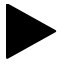
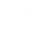
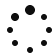
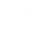
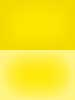
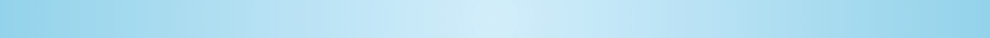

In [ ]:
string_soup

In [ ]:
phone_numbers = re.findall(r'Phone:</h4>\s*(\(\d{3}\) \d{3}-\d{4})', string_soup)
phone_numbers

['(310) 794-5427']

- Below for each ladder faculty member, I print out the phone number associated with their webpage. If the faculty member did not have a phone number listed, as many did not, I printed 'No phone number found" instead.

In [ ]:
for email in unique_lst:
    response = requests.get(email)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')
    string_soup = str(soup)
    phone_numbers = re.findall(r'Phone:</h4>\s*(\(\d{3}\) \d{3}-\d{4})', string_soup)
    if phone_numbers:
        print(phone_numbers[0])
    else:
        print('No phone number found.')

(310) 794-1686
(310) 825-3925
No phone number found.
No phone number found.
No phone number found.
(310) 206-6732
No phone number found.
No phone number found.
No phone number found.
(310) 825-4521
(310) 825-4249
No phone number found.
(310) 794-5342
(310) 825-3847
(310) 206-8896
(310) 794-7098
(310) 825-7380
(310) 825-2523
No phone number found.
No phone number found.
No phone number found.
(310) 825-1011
(310) 825-0979
No phone number found.
(310) 825-1011
(310) 825-6682
No phone number found.
(310) 825-1011
No phone number found.
No phone number found.
No phone number found.
(310) 794-7241
(310) 794-6495
(310) 825-0849
(310) 825-7371
(310) 825-9397
(310) 825-8018
(310) 825-5304
(310) 206-6031
(310) 825-5665
(310) 206-2833
No phone number found.
(310) 206-9463
No phone number found.
(310) 794-5427


## 5. 
## I used selenium to web scape the MakeMyTrip website to find flight details of all the flights from Los Angeles to Delhi

In [99]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [100]:
#PATH = "/Users/diama/Desktop/chromedriver"
PATH = "/Users/Dhriti/Downloads/chromedriver_mac_arm64/chromedriver"

In [101]:
URL = "https://www.makemytrip.com"

In [102]:
#PATH = "/Users/Dhriti/Downloads/chromedriver_mac64/chromedriver"
driver = webdriver.Chrome(PATH)
driver.get(URL)

/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_1678/4290619411.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


### Used Selenium to scrape valuable information from the website and stored it in a dataframe.

In [103]:
import pandas as pd
import time
from selenium.webdriver.common.action_chains import ActionChains

In [104]:
flight_xpath = '//a[@href="https://www.makemytrip.com/flights/"]'

flight_element = WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH, flight_xpath)))
flight_element.click()
time.sleep(0.2)

In [105]:
oneway_xpath = '//li[@class="selected" and @data-cy="oneWayTrip"]' 
one_way_element = WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH, oneway_xpath)))
one_way_element.click()
time.sleep(0.2)

In [106]:
actions = ActionChains(driver)

search= driver.find_element(By.ID, "fromCity")
search.send_keys("LAX")
search.send_keys(Keys.RETURN)

# Move the mouse to a random position on the page and click
actions.move_by_offset(0, 0).click().perform()

In [107]:
arrival_search= driver.find_element(By.ID, "toCity")
arrival_search.send_keys("New Delhi, India")
arrival_search.send_keys(Keys.RETURN)

# Move the mouse to a random position on the page and click
actions.move_by_offset(0, 0).click().perform()

In [108]:
# Find the "Search" button by its class name
button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, "widgetSearchBtn")))

# Click on the button
button.click()

In [126]:
# wait for the pricing elements to load
pricing_elements = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="textRight flexOne"]/p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')))

# extract the pricing information from each element's text and store it in a list
pricing_list = [element.text for element in pricing_elements]
pricing_list = [element for element in pricing_list if element.strip()]
# print the list of pricing information
print(pricing_list)


['$ 483', '$ 635', '$ 695', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 752', '$ 768', '$ 768', '$ 768', '$ 768', '$ 772', '$ 785', '$ 790', '$ 790', '$ 790', '$ 790', '$ 790', '$ 793', '$ 799', '$ 799', '$ 808', '$ 817', '$ 835', '$ 836', '$ 850', '$ 862', '$ 862', '$ 862', '$ 862', '$ 882', '$ 882', '$ 882', '$ 884', '$ 902', '$ 903', '$ 905', '$ 910', '$ 928']


In [111]:
# Find all elements with class name 'flightTimeInfo'
elements = driver.find_elements(By.CLASS_NAME, 'flightTimeInfo')

# Create empty lists to store the departure and arrival times
departure_times = []
arrival_times = []

# Loop through each element
for i, element in enumerate(elements):
    # Extract the text from the span element within the parent element
    flight_time = element.find_element(By.TAG_NAME, 'span').text
    
    # If the flight time is not empty
    if flight_time.strip():
        # If it's an odd-numbered element, add the time to the departure list
        if i % 2 == 0:
            departure_times.append(flight_time)
        # If it's an even-numbered element, add the time to the arrival list
        else:
            arrival_times.append(flight_time)

# Print the departure and arrival times lists
print(departure_times)

['12:30', '11:55', '11:55', '21:10', '19:20', '17:35', '17:35', '15:40', '15:40', '15:25', '14:30', '13:05', '13:05', '10:45', '10:45', '09:00', '09:00', '08:40', '16:30', '11:25', '11:25', '10:30', '10:30', '07:55', '19:12', '18:04', '23:00', '19:12', '18:30', '09:55', '20:30', '17:25', '20:05', '19:30', '11:55', '15:55', '20:45', '21:30', '21:30', '20:05', '20:05', '11:20', '23:00', '23:55', '10:30', '20:10', '12:00', '10:25', '18:15', '14:00']


In [112]:
print(arrival_times)

['11:40', '21:55', '18:10', '21:30', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '21:45', '20:50', '20:50', '20:50', '20:50', '20:50', '23:30', '23:30', '23:30', '08:20', '08:20', '08:20', '23:30', '23:30', '23:30', '08:20', '00:55', '18:10', '23:30', '21:30', '01:55', '08:45', '08:20', '08:45', '14:45', '03:10', '09:05', '20:50', '08:20', '11:15', '23:30', '23:50', '18:20']


In [113]:
# Find airlines
elements = driver.find_elements(By.CLASS_NAME, 'airlineName')
airlines = [element.text for element in elements]
airlines = [element for element in airlines if element.strip()]

In [114]:
print(airlines)

['Air India', 'Air India, Vistara', 'Air India, Vistara', 'United Airlines', 'Air Canada', 'Air Canada', 'United Airlines', 'Air Canada', 'United Airlines', 'United Airlines', 'United Airlines, Air Canada', 'Air Canada', 'United Airlines', 'United Airlines', 'Air Canada', 'United Airlines, Air Canada', 'United Airlines', 'Air Canada', 'United Airlines', 'Air Canada', 'United Airlines', 'Air Canada', 'United Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'Lufthansa', 'Lufthansa', 'American Airlines', 'Lufthansa', 'Air India', 'Lufthansa', 'American Airlines', 'Qatar Airways', 'Qatar Airways', 'Qatar Airways', 'Qatar Airways', 'Emirates', 'Emirates', 'Emirates', 'United Airlines', 'American Airlines', 'Air India', 'American Airlines', 'Swiss', 'Saudia']


In [115]:
elements = driver.find_elements_by_xpath('//div[@class="stop-info flexOne"]/p')
durations = [element.text for element in elements]
print(durations)
len(duration)

/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_1678/4211372917.py:1: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  elements = driver.find_elements_by_xpath('//div[@class="stop-info flexOne"]/p')


['13 h 40 m', '24 h 30 m', '', '', '20 h 45 m', '', '', '14 h 50 m', '', '16 h 55 m', '18 h 40 m', '', '', '', '18 h 40 m', '', '', '20 h 35 m', '', '', '20 h 35 m', '', '', '20 h 50 m', '', '', '21 h 45 m', '', '', '23 h 10 m', '', '', '23 h 10 m', '', '', '25 h 30 m', '', '', '', '25 h 30 m', '', '', '27 h 15 m', '', '', '27 h 15 m', '', '', '27 h 35 m', '', '', '18 h 50 m', '', '', '23 h 55 m', '', '23 h 55 m', '', '', '', '24 h 50 m', '', '', '24 h 50 m', '', '', '30 h 05 m', '', '', '18 h 48 m', '', '', '19 h 56 m', '', '', '23 h 50 m', '', '', '27 h 38 m', '', '', '28 h 20 m', '', '', '28 h 05 m', '', '', '17 h 30 m', '', '', '20 h 35 m', '', '', '26 h 45 m', '', '', '19 h 55 m', '', '', '20 h 45 m', '', '', '22 h 05 m', '', '', '15 h 15 m', '', '', '18 h 55 m', '', '', '25 h 45 m', '26 h 45 m', '27 h 10 m', '', '', '17 h 55 m', '', '', '18 h 40 m', '23 h 40 m', '', '', '', '24 h 50 m', '26 h 40 m', '', '', '13 h 45 m', '27 h 35 m', '', '', '20 h 05 m', '', '', '', '18 h 50 m']


9

In [127]:
# create DataFrame
df = pd.DataFrame({
    'Airline': airlines,
     'Prices' : pricing_list, 
    'Departure time': departure_times,
    'Arrival time': arrival_times,
    'Duration':duration
})

In [128]:
df

,Airline,Prices,Departure time,Arrival time,Duration
0,Air India,$ 483,12:30,11:40,13 h 40 m
1,"Air India, Vistara",$ 635,11:55,21:55,13 h 40 m
2,"Air India, Vistara",$ 695,11:55,18:10,13 h 40 m
3,United Airlines,$ 752,21:10,21:30,13 h 40 m
4,Air Canada,$ 752,19:20,21:45,13 h 40 m
5,Air Canada,$ 752,17:35,21:45,13 h 40 m
6,United Airlines,$ 752,17:35,21:45,13 h 40 m
7,Air Canada,$ 752,15:40,21:45,13 h 40 m
8,United Airlines,$ 752,15:40,21:45,13 h 40 m
9,United Airlines,$ 752,15:25,21:45,13 h 40 m


Above, I webscraped data on flights departing from Los Angeles, CA and arriving to Delhi, India. These were the most recent flights available. I gathered information on the airlines, price, departure time, duration and arrival time. This information could be used for MQE students from India needing information on when they would be able to arrive home and how much it would cost them.